In [1]:
import pandas as pd
data = pd.read_csv("TheKeplerTable.csv")
data.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,11446443,K00001.01,Kepler-1 b,CONFIRMED,CANDIDATE,0.811,0,0,0,0,...,761.46,4304.3,1,q1_q17_dr25_tce,5820.0,4.457,0.964,286.80847,49.316399,11.338
1,10666592,K00002.01,Kepler-2 b,CONFIRMED,CANDIDATE,1.000,0,1,0,0,...,4148.92,5945.9,1,q1_q17_dr25_tce,6440.0,4.019,1.952,292.24728,47.969521,10.463
2,10748390,K00003.01,Kepler-3 b,CONFIRMED,CANDIDATE,0.913,0,0,0,0,...,96.67,862.3,1,q1_q17_dr25_tce,4778.0,4.591,0.763,297.70935,48.080853,9.174
3,3861595,K00004.01,Kepler-1658 b,CONFIRMED,CANDIDATE,1.000,0,1,0,0,...,4055.29,132.7,1,q1_q17_dr25_tce,6244.0,3.657,2.992,294.35654,38.947380,11.432
4,8554498,K00005.01,NaN,CANDIDATE,CANDIDATE,1.000,0,0,0,0,...,1020.05,380.8,1,q1_q17_dr25_tce,5937.0,4.012,1.787,289.73972,44.647419,11.665


In [2]:
data.isnull().sum()

,0
kepid,0
kepoi_name,0
kepler_name,5326
koi_disposition,0
koi_pdisposition,0
koi_score,0
koi_fpflag_nt,0
koi_fpflag_ss,0
koi_fpflag_co,0
koi_fpflag_ec,0


### To understand the features that effect the classification of a KOI (Kepler's Object of Interest) to a confirmed planet. `kepler_name` is the confirmed planet's name which will be excluded in the analysis to prevent the memorization by the algorithm. kepoi_name column is the names of all Kepler's Objects of Interest.

In [3]:
data.columns

Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_time0bk',
       'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq',
       'koi_insol', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_tce_delivname',
       'koi_steff', 'koi_slogg', 'koi_srad', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

In [4]:
data["koi_disposition"].unique()

array(['CONFIRMED', 'CANDIDATE', 'FALSE POSITIVE'], dtype=object)

### `koi_disposition`
### CONFIRMED : shows confirmed as planet outside Kepler experiment as well.
### CANDIDATE : Kepler's Object of Interest to be determined as planet or not.
### FALSE POSITIVE : Objects that was mis classified as planet, but actually they are not.

In [5]:
data.columns

Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_time0bk',
       'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq',
       'koi_insol', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_tce_delivname',
       'koi_steff', 'koi_slogg', 'koi_srad', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

In [6]:
data = data[['koi_score','koi_fpflag_nt', 'koi_fpflag_ss','koi_fpflag_co',
              'koi_fpflag_ec', 'koi_period', 'koi_time0bk', 'koi_impact', 'koi_duration',
              'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol', 'koi_model_snr', 'koi_tce_plnt_num',
              'koi_steff', 'koi_slogg', 'koi_srad', 'ra', 'dec', 'koi_kepmag','koi_disposition']]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8054 entries, 0 to 8053
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   koi_score         8054 non-null   float64
 1   koi_fpflag_nt     8054 non-null   int64  
 2   koi_fpflag_ss     8054 non-null   int64  
 3   koi_fpflag_co     8054 non-null   int64  
 4   koi_fpflag_ec     8054 non-null   int64  
 5   koi_period        8054 non-null   float64
 6   koi_time0bk       8054 non-null   float64
 7   koi_impact        7995 non-null   float64
 8   koi_duration      8054 non-null   float64
 9   koi_depth         7995 non-null   float64
 10  koi_prad          7995 non-null   float64
 11  koi_teq           7995 non-null   float64
 12  koi_insol         7995 non-null   float64
 13  koi_model_snr     7995 non-null   float64
 14  koi_tce_plnt_num  8054 non-null   int64  
 15  koi_steff         7995 non-null   float64
 16  koi_slogg         7995 non-null   float64


In [8]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
data["koi_disposition"] = encoder.fit_transform(data[["koi_disposition"]])

In [9]:
data["koi_disposition"]

,koi_disposition
0,1.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
8049,2.0
8050,2.0
8051,2.0
8052,2.0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8054 entries, 0 to 8053
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   koi_score         8054 non-null   float64
 1   koi_fpflag_nt     8054 non-null   int64  
 2   koi_fpflag_ss     8054 non-null   int64  
 3   koi_fpflag_co     8054 non-null   int64  
 4   koi_fpflag_ec     8054 non-null   int64  
 5   koi_period        8054 non-null   float64
 6   koi_time0bk       8054 non-null   float64
 7   koi_impact        7995 non-null   float64
 8   koi_duration      8054 non-null   float64
 9   koi_depth         7995 non-null   float64
 10  koi_prad          7995 non-null   float64
 11  koi_teq           7995 non-null   float64
 12  koi_insol         7995 non-null   float64
 13  koi_model_snr     7995 non-null   float64
 14  koi_tce_plnt_num  8054 non-null   int64  
 15  koi_steff         7995 non-null   float64
 16  koi_slogg         7995 non-null   float64


In [11]:
data.isnull().sum()

,0
koi_score,0
koi_fpflag_nt,0
koi_fpflag_ss,0
koi_fpflag_co,0
koi_fpflag_ec,0
koi_period,0
koi_time0bk,0
koi_impact,59
koi_duration,0
koi_depth,59


In [16]:
data.dropna(inplace=True)

In [17]:
features = data.drop("koi_disposition",axis=1)
target = data["koi_disposition"]

### Baseline model OOB score

In [18]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=300, oob_score=True)
model.fit(features,target)
oob_score = model.oob_score_
print(f"The Baseline Model OOB Score is {oob_score}")

The Baseline Model OOB Score is 0.9173129847385539


In [ ]:
!pip install rfpimp

### Feature Importances of the Baseline Model

                  Importance
Feature                     
koi_score             0.3984
koi_model_snr         0.1266
koi_prad              0.0774
koi_impact            0.0290
koi_fpflag_nt         0.0152
koi_fpflag_co         0.0128
koi_depth             0.0072
koi_time0bk           0.0052
ra                    0.0050
koi_duration          0.0042
dec                   0.0040
koi_steff             0.0036
koi_kepmag            0.0034
koi_period            0.0032
koi_tce_plnt_num      0.0026
koi_teq               0.0024
koi_fpflag_ss         0.0020
koi_insol             0.0018
koi_slogg             0.0014
koi_fpflag_ec         0.0010
koi_srad              0.0008


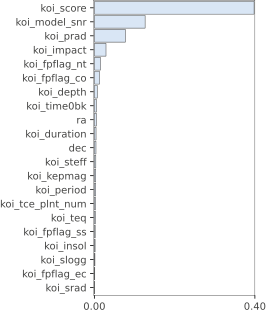

In [22]:
from rfpimp import importances, plot_importances
imp = importances(model, features ,target)
print(imp)
plot_importances(imp)

### Training the model after a Train Test Split

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.2)

In [27]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 300, oob_score=True)
model.fit(X_train,y_train)
oob_score = model.oob_score_
print("The Model OOB Score:",oob_score)

The Model OOB Score: 0.9169663799843628


                  Importance
Feature                     
koi_score             0.3902
koi_model_snr         0.1218
koi_prad              0.0624
koi_impact            0.0286
koi_fpflag_co         0.0152
koi_fpflag_nt         0.0104
koi_depth             0.0046
koi_duration          0.0038
koi_time0bk           0.0028
koi_tce_plnt_num      0.0024
koi_steff             0.0020
dec                   0.0018
ra                    0.0012
koi_kepmag            0.0012
koi_fpflag_ss         0.0012
koi_srad              0.0010
koi_insol             0.0010
koi_slogg             0.0006
koi_teq               0.0006
koi_period            0.0006
koi_fpflag_ec         0.0000


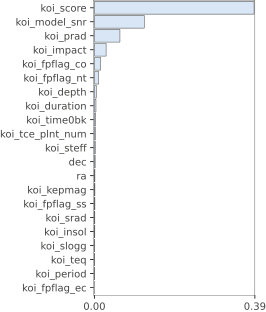

In [28]:
from rfpimp import importances, plot_importances

imp = importances(model, features, target)
print(imp)
plot_importances(imp)

In [29]:
model.predict(X_test)

array([2., 2., 1., ..., 1., 2., 2.])

In [30]:
model.score(X_train,y_train)

1.0

In [31]:
model.score(X_test,y_test)

0.9237023139462164

### K-Cross Validation

In [32]:
from sklearn.model_selection import cross_val_score

kcross_validation = cross_val_score(model, features, target, cv=5, scoring='r2')
mean_cv_score_r2 = kcross_validation.mean()
print("Mean Cross-Validated R-squared:",mean_cv_score_r2)

Mean Cross-Validated R-squared: 0.7799215671395064


### Creating a Final Model

In [33]:
imp_df = pd.DataFrame(imp)

In [35]:
imp_df[imp_df["Importance"]>=0.01]

,Importance
Feature,
koi_score,0.3902
koi_model_snr,0.1218
koi_prad,0.0624
koi_impact,0.0286
koi_fpflag_co,0.0152
koi_fpflag_nt,0.0104


In [36]:
features = data[["koi_score","koi_model_snr","koi_prad","koi_impact","koi_fpflag_co","koi_fpflag_nt"]]

In [37]:
target = data["koi_disposition"]

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.2)

In [39]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 300, oob_score=True)
model.fit(X_train,y_train)
oob_score = model.oob_score_
print("The Final Model OOB Score:",oob_score)

The Final Model OOB Score: 0.9111806098514464


               Importance
Feature                  
koi_score          0.4684
koi_model_snr      0.1506
koi_prad           0.1330
koi_impact         0.0788
koi_fpflag_nt      0.0236
koi_fpflag_co      0.0202


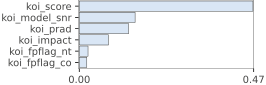

In [40]:
from rfpimp import importances, plot_importances

imp = importances(model, features, target)
print(imp)
plot_importances(imp)

In [41]:
model.predict(X_test)

array([0., 1., 2., ..., 0., 2., 1.])

In [42]:
model.score(X_train,y_train)

1.0

In [43]:
model.score(X_test,y_test)

0.9105691056910569

In [45]:
from sklearn.model_selection import cross_val_score

kcross_validation = cross_val_score(model, features, target, cv=5, scoring='r2')
mean_cv_score_r2 = kcross_validation.mean()
print("Mean Cross-Validated R-squared:",mean_cv_score_r2)

Mean Cross-Validated R-squared: 0.7895940101392693
